In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("stud_math.csv")

In [3]:
columns04 = ['Medu', 'Fedu']
columns14 = ['traveltime', 'studytime']
columns15 = ['famrel', 'freetime', 'goout', 'health']

def view_string_column(df, column):
  if df[column].dtype == 'object':
    display(df[column].value_counts())
    print('{} - NaN\n'.format(len(df[column][df[column].isna()])))
  return None

def view_numeric_column(df, column):
  if df[column].dtype == 'float64':
    display(df[column].value_counts())
    print('{} - NaN\n'.format(len(df[column][df[column].isna()])))
  return None

def draw_hist(df, column):
  fig = plt.figure()
  axes = fig.add_axes([0, 0, 1, 1])
  axes.hist(df[column])
  axes.set_title(column)
  return None

def draw_numeric_column(df, column):
  if df[column].dtype == 'float64':
    draw_hist(df, column)
  return None

def string_to_bool(df, column):
  if df[column].dtype == 'object':
    if {'yes', 'no'} == set(df[column].str.cat(sep=',').split(',')):
      print(column)
      return df[column].astype(str).apply(lambda x: True if x == 'yes' else False if x == 'no' else None)
  return df[column]  

def out_values(df, column, inter='linear'):
  iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
  perc25 = df[column].quantile(q=0.25, interpolation=inter)
  perc75 = df[column].quantile(0.75, interpolation=inter)
  return df[column].apply(lambda x: None if x<(perc25 - 1.5*iqr) or x>(perc75 + 1.5*iqr) else x)

def out_values_range(df, column, val_range):
  x,y = val_range
  return df[column].apply(lambda x: x if ((x%1)==0) and (x in range(x, y)) else None)

'''def out_values14(df, column):
  return df[column].apply(lambda x: x if x in range(1,5) else None)

def out_values15(df, column):
  return df[column].apply(lambda x: x if x in range(1,6) else None)'''

def fillna_median(df, column):
  return df[column].fillna(df[column].median())

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
for column in df.columns:
  view_string_column(df, column)

GP    349
MS     46
Name: school, dtype: int64

0 - NaN



F    208
M    187
Name: sex, dtype: int64

0 - NaN



U    295
R     83
Name: address, dtype: int64

17 - NaN



GT3    261
LE3    107
Name: famsize, dtype: int64

27 - NaN



T    314
A     36
Name: Pstatus, dtype: int64

45 - NaN



other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

19 - NaN



other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

36 - NaN



course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

17 - NaN



mother    250
father     86
other      28
Name: guardian, dtype: int64

31 - NaN



no     335
yes     51
Name: schoolsup, dtype: int64

9 - NaN



yes    219
no     137
Name: famsup, dtype: int64

39 - NaN



no     200
yes    155
Name: paid, dtype: int64

40 - NaN



yes    195
no     186
Name: activities, dtype: int64

14 - NaN



yes    300
no      79
Name: nursery, dtype: int64

16 - NaN



yes    356
no      19
Name: higher, dtype: int64

20 - NaN



yes    305
no      56
Name: internet, dtype: int64

34 - NaN



no     240
yes    124
Name: romantic, dtype: int64

31 - NaN



In [8]:
for item in df.columns:
  view_numeric_column(df, item)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

3 - NaN



2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

24 - NaN



1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

28 - NaN



2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

7 - NaN



0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

22 - NaN



-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

7 - NaN



 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

27 - NaN



3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

11 - NaN



3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

8 - NaN



5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

15 - NaN



0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

12 - NaN



50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

6 - NaN



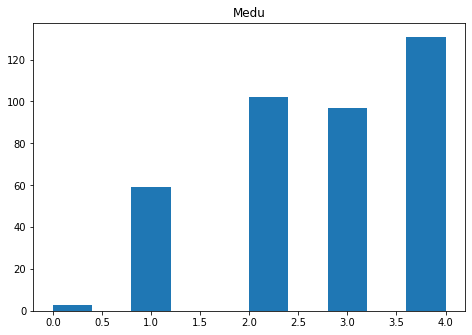

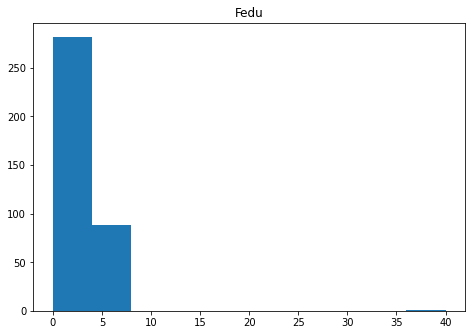

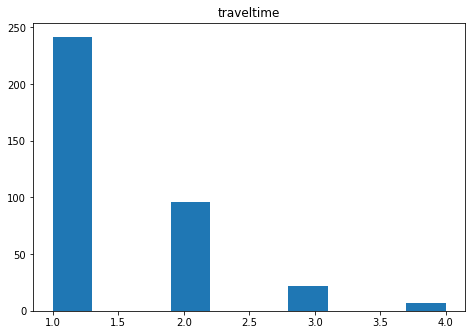

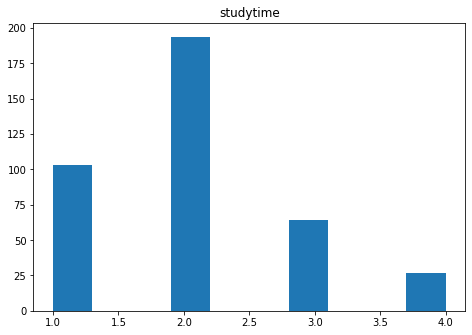

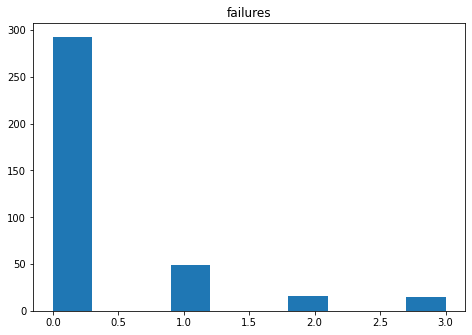

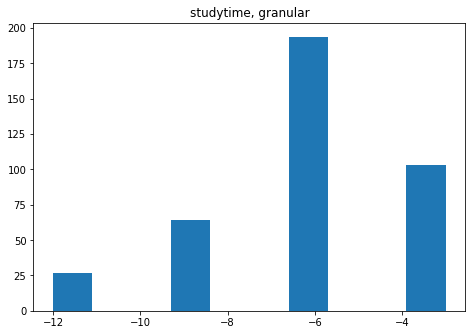

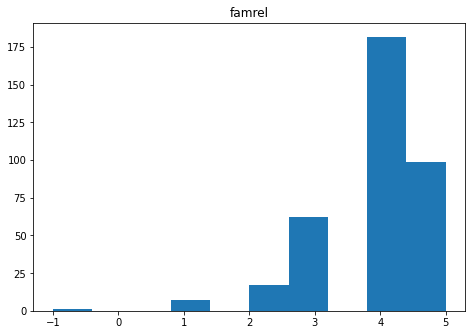

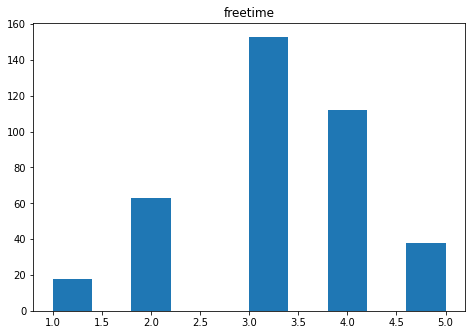

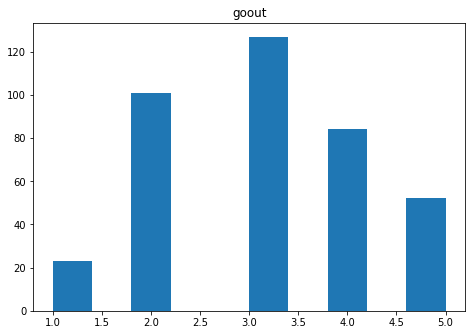

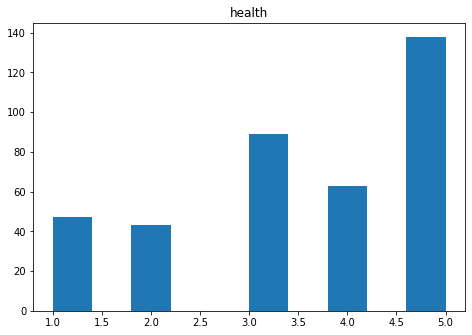

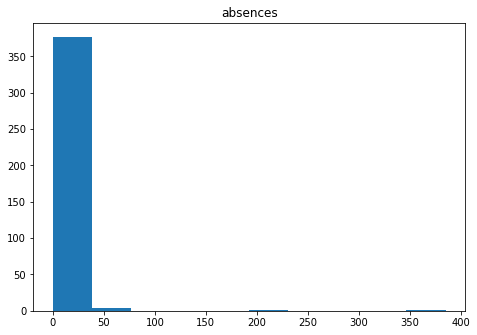

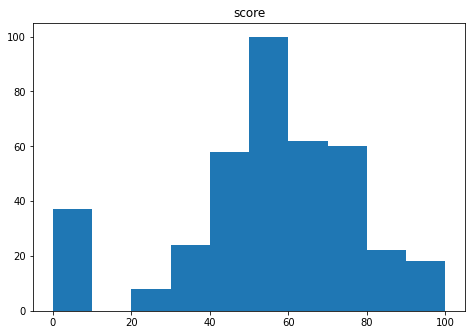

In [9]:
for item in df.columns:
  draw_numeric_column(df, item)

In [11]:
for column in df.columns:
  df[column] = string_to_bool(df, column)

schoolsup
famsup
paid
activities
nursery
higher
internet
romantic


In [12]:
"""for column in columns04:
  df[column] = out_values_range(df, column, (0,5))
for column in columns14:
  df[column] = out_values_range(df, column, (1,5))
for column in columns14:
  df[column] = out_values_range(df, column, (1,6))"""
df['failures'] = out_values_range(df, 'failures', (0,4))


TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
df['score'] = out_values(df, 'score')

In [ ]:
 df['absences'] = out_values(df, 'absences', inter='midpoint')

In [ ]:
for item in df.columns:
  view_numeric_column(df, item)

In [ ]:
df = df.loc[df.score.dropna()]

In [ ]:
for column in columns04:
  df[column] = fillna_median(df, column)
for column in columns14:
  df[column] = fillna_median(df, column)
for column in columns15:
  df[column] = fillna_median(df, column)

In [ ]:
df

0      4.0
1      1.0
2      1.0
3      4.0
4      3.0
      ... 
390    2.0
391    3.0
392    1.0
393    3.0
394    1.0
Name: Medu, Length: 395, dtype: float64

AttributeError: ignored

In [ ]:
5.1%1

0.09999999999999964

In [ ]:
1.0 in range(1,3)

True

In [ ]:
x,y = (0,2)

In [ ]:
x

0

In [ ]:
y

2

In [ ]:
df

school sex  age address famsize  ... freetime  goout  health absences score
0       GP   F   18       U     NaN  ...      3.0    4.0     3.0      6.0  30.0
1       GP   F   17       U     GT3  ...      3.0    3.0     3.0      4.0  30.0
2       GP   F   15       U     LE3  ...      3.0    2.0     3.0     10.0  50.0
3       GP   F   15       U     GT3  ...      2.0    2.0     5.0      2.0  75.0
4       GP   F   16       U     GT3  ...      3.0    2.0     5.0      4.0  50.0
..     ...  ..  ...     ...     ...  ...      ...    ...     ...      ...   ...
390     MS   M   20       U     LE3  ...      5.0    4.0     4.0    212.0  45.0
391     MS   M   17       U     LE3  ...      4.0    5.0     2.0      3.0  80.0
392     MS   M   21       R     GT3  ...      5.0    3.0     3.0      3.0  35.0
393     MS   M   18       R     LE3  ...      4.0    1.0     5.0      0.0  50.0
394     MS   M   19       U     LE3  ...      2.0    3.0     5.0      5.0  45.0

[395 rows x 30 columns]